# Desicion tree assignment

Veronika Bokan

This assignment is based on materials from [mlcourse.ai] (https://mlcourse.ai)

Building a decision tree for predicting heart diseases

Let’s read the data on heart diseases. The dataset can be downloaded from the course repo from here.

https://www.dropbox.com/s/kr1d9vsnax5wxfo/mlbootcamp5_train.csv?dl=0

## Problem

Predict presence or absence of cardiovascular disease (CVD) using the patient examination results.

## Data description

There are 3 types of input features:

- Objective: factual information;

- Examination: results of medical examination;

- Subjective: information given by the patient.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv("mlbootcamp5_train.csv", sep=';', decimal=',')
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Transform the features: - create “age in years” (age_years)dividing age by 365.25 and taking floor (⌊x⌋ is the largest integer that is less than or equal to x) - remove “age” feature - transfrom cholesterol and gluc to factor

In [3]:
data["age_years"] = data["age"] / 365.25
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.357290
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.381246
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.627652
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.249144
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.841205


In [4]:
data.drop('age',axis='columns', inplace=True)
data.head()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,2,168,62.0,110,80,1,1,0,0,1,0,50.357290
1,1,1,156,85.0,140,90,3,1,0,0,1,1,55.381246
2,2,1,165,64.0,130,70,3,1,0,0,0,1,51.627652
3,3,2,169,82.0,150,100,1,1,0,0,1,1,48.249144
4,4,1,156,56.0,100,60,1,1,0,0,0,0,47.841205


In [5]:
dataset = pd.get_dummies(data, columns = ['gender', 'smoke', 'alco', 'active'])
standardScaler = StandardScaler()
columns_to_scale = ['weight', 'cholesterol', 'ap_hi', 'ap_lo', 'age_years', 'height', 'gluc']
#columns_to_scale = [ 'cholesterol',  'gluc']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])
dataset.head()

,id,height,weight,ap_hi,ap_lo,cholesterol,gluc,cardio,age_years,gender_1,gender_2,smoke_0,smoke_1,alco_0,alco_1,active_0,active_1
0,0,0.443452,-0.847873,-0.122182,-0.088238,-0.539322,-0.39572,0,-0.436062,0,1,1,0,1,0,0,1
1,1,-1.018168,0.749831,0.072610,-0.035180,2.400793,-0.39572,1,0.307686,1,0,1,0,1,0,0,1
2,2,0.078047,-0.708942,0.007679,-0.141297,2.400793,-0.39572,1,-0.247997,1,0,1,0,1,0,1,0
3,3,0.565254,0.541435,0.137541,0.017879,-0.539322,-0.39572,1,-0.748152,0,1,1,0,1,0,0,1
4,4,-1.018168,-1.264666,-0.187113,-0.194356,-0.539322,-0.39572,0,-0.808543,1,0,1,0,1,0,1,0


Split data into train and test parts in the proportion of 7/3. The target feature is cardio

In [6]:
y = dataset['cardio']
X = dataset.drop(['cardio'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

Train a decision tree on the dataset training with max depth equal to 3.  Use default cross validation parameters.

In [26]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, max_depth=3, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    test = dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

Plot final tree 

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

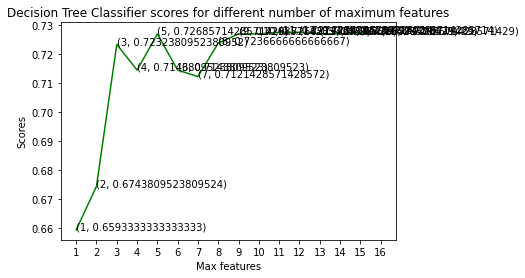

In [8]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

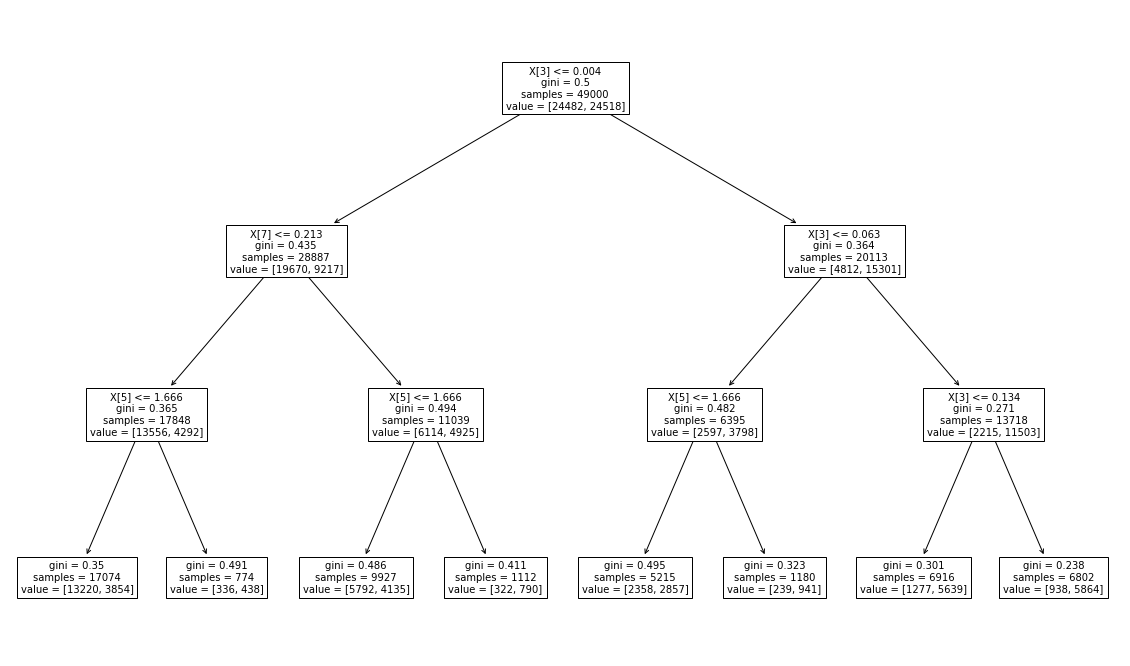

In [30]:
from sklearn import tree
plt.figure(figsize=(20,12))  # set plot size (denoted in inches)
tree.plot_tree(test, fontsize=10)
plt.show()

What is the accuracy of prediction on test data?

In [31]:
dt_classifier.score(X_test, y_test)

0.7268571428571429

Now set cross validation parameters: method = "cv", number = 5. Tree parameters set to default.

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree
parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, cv =5, n_jobs=4)
clf.fit(X=X_test, y=y_test)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.7341904761904761 {'max_depth': 5}


In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree
dt_scores = []
parameters = {'max_depth':range(3,20)}
for i in range(1, len(X.columns) + 1):
    dt_classifier = GridSearchCV(tree.DecisionTreeClassifier(), parameters, cv =5, n_jobs=4)
    dt_classifier.fit(X_train, y_train)
    test2 =  dt_classifier.fit(X_train, y_train)
    tree_model = dt_classifier.best_estimator_
    dt_scores.append(dt_classifier.best_score_)

Plot final tree 

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

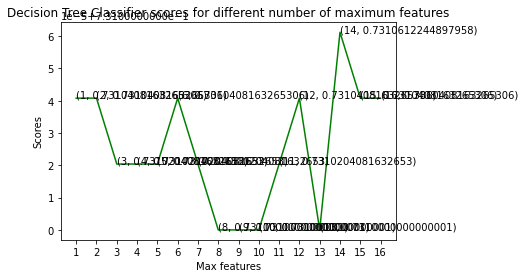

In [34]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

What is the accuracy of prediction on test data?

In [35]:
dt_classifier.best_score_

0.7310408163265306

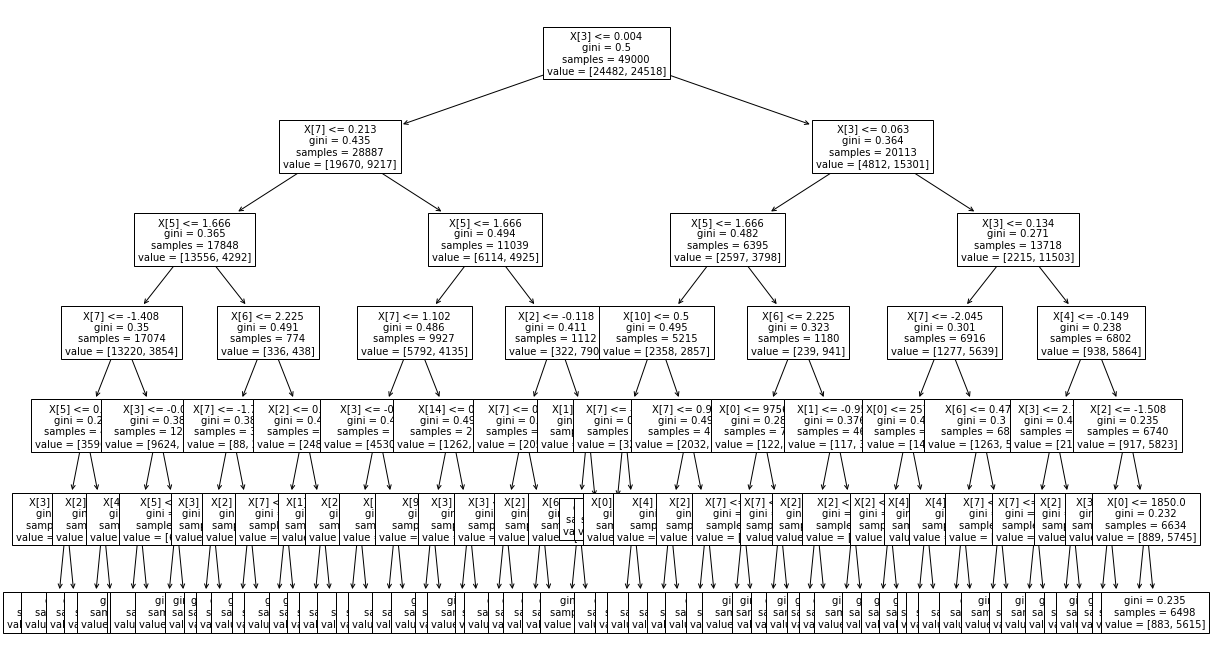

In [41]:
plt.figure(figsize=(20,12))  # set plot size (denoted in inches)
tree.plot_tree(tree_model, fontsize=10)
plt.show()